In [1]:
import h5py
import pylab as pl
import numpy as np
import matplotlib.colors as mpc
import networkx
import ipyvolume as ipv
import progressbar

In [2]:
pl.rc('font', size = 20)
pl.rc('legend', fontsize = 20)

In [3]:
sim = h5py.File('/data/cielo/simulations/LG1/LG1.hdf5', 'r')
trees = networkx.read_multiline_adjlist('/data/cielo/simulations/LG1/LG1_tree.dat')

In [4]:
ff = 4338

OffStar = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][ff].astype('int')
L = sim['SnapNumber_128/PartType4/SpecificAngularMomentum'][OffStar[0]:OffStar[1]]

In [5]:
Ls = np.array([np.sum(L[:,0]), np.sum(L[:,1]), np.sum(L[:,2])])

In [6]:
Mass = sim['SnapNumber_128/PartType4/Masses'][OffStar[0]:OffStar[1]]

In [7]:
Lm = np.array([np.sum(L[:,0]*Mass), np.sum(L[:,1]*Mass), np.sum(L[:,2]*Mass)])

In [8]:
L[np.array([0,1,2,4,7])]

array([[ 25.4662434 , 129.07444874, 185.12871399],
       [ 31.43267469, 169.58923276, 273.99758539],
       [ 80.76265133,  93.0534055 , 231.01107819],
       [105.79990925, 103.79928043, 245.39271274],
       [ 33.38317609,  41.51108819, 187.02897457]])

In [9]:
#np.random.choice?

In [10]:
Lsize = np.sqrt(np.sum(Ls**2))
Lnorm = Ls/Lsize
Lnorm

array([0.01694583, 0.09309724, 0.9955128 ])

In [11]:
# anyway, lets test with this angle, lest use a big one and others
nsize = 1000 #
n = np.linspace(5, L.shape[0], nsize).astype('int')
n = np.unique(n) # just in case

I = np.arange(L.shape[0])

CosT = []
for ni in n:
    i = np.random.choice(I, size=ni, replace=False)
    Ltest = L[i]
    Lsum = np.array([np.sum(Ltest[:,0]), np.sum(Ltest[:,1]), np.sum(Ltest[:,2])])
    LSs = np.sqrt(np.sum(Lsum**2))
    Lsum = Lsum/LSs
    CosT.append(np.dot(Lsum, Lnorm))

CosT = np.array(CosT)

In [12]:
CosT.size

1000

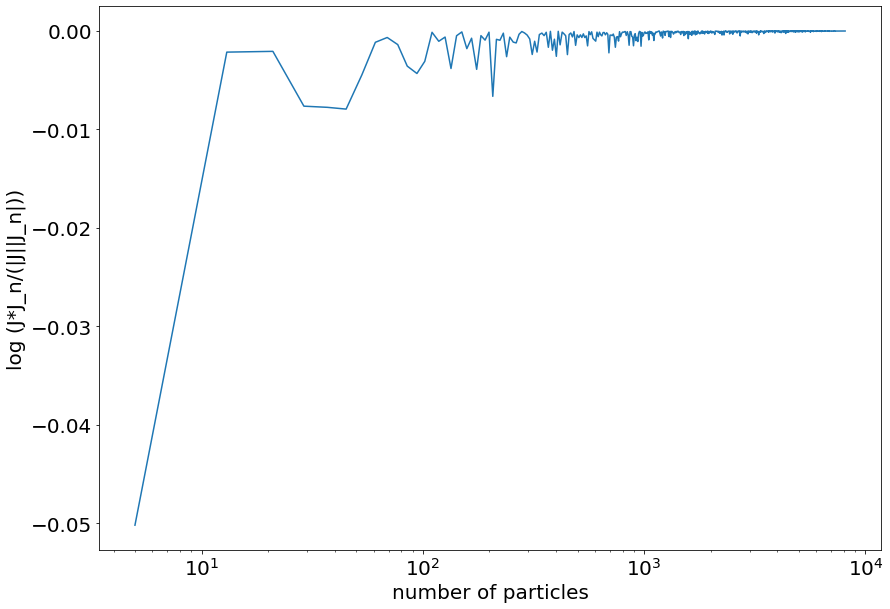

In [13]:
pl.figure(figsize=(14, 10))

pl.plot(n, np.log10(CosT))

pl.xlabel('number of particles')

pl.ylabel('log (J*J_n/(|J||J_n|))')

pl.xscale('log')

In [14]:
# ok, that works like a charm, lets do this but with errors. a lot of errors

# anyway, lets test with this angle, lest use a big one and others
nsize, ninstances = 1000, 1000 #
n = np.linspace(5, L.shape[0], nsize).astype('int')
n = np.unique(n) # just in case

bar = progressbar.ProgressBar(max_value=n.size)
c = 0

I = np.arange(L.shape[0])

CosT, nper25, nper40, nper60, nper75 = [], [], [], [], []
for ni in n:
    versions = []
    for k in range(ninstances):
        i = np.random.choice(I, size=ni, replace=False)
        Ltest = L[i]
        Lsum = np.array([np.sum(Ltest[:,0]), np.sum(Ltest[:,1]), np.sum(Ltest[:,2])])
        LSs = np.sqrt(np.sum(Lsum**2))
        Lsum = Lsum/LSs
        versions.append(np.dot(Lsum, Lnorm))
    n25, n40, n50, n60, n75 = np.percentile(versions, [10,25,50,75,90])
    CosT.append(n50)
    nper25.append(n25)
    nper40.append(n40)
    nper60.append(n60)
    nper75.append(n75)
    c += 1
    bar.update(c)
    
CosT, nper25, nper40, nper60, nper75 = np.array(CosT), np.array(nper25), np.array(nper40), np.array(nper60), np.array(nper75)

100% (1000 of 1000) |####################| Elapsed Time: 0:03:37 ETA:  00:00:00

45

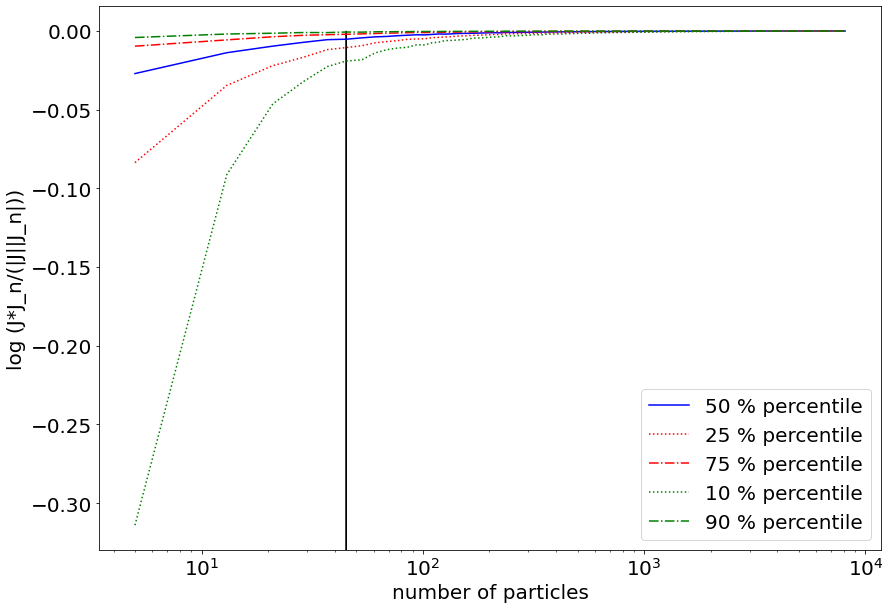

In [15]:
pl.figure(figsize=(14, 10))

iup = np.where(np.log10(nper25)>np.log10(0.95))[0]
ii = iup.min()
nup = n[ii]



pl.plot(n, np.log10(CosT), ls='-', label='50 % percentile', color='blue')
pl.plot(n, np.log10(nper40), ls=':', label='25 % percentile', color='red')
pl.plot(n, np.log10(nper60), ls='-.', label='75 % percentile', color='red')

pl.plot(n, np.log10(nper25), ls=':', label='10 % percentile', color='green')
pl.plot(n, np.log10(nper75), ls='-.', label='90 % percentile', color='green')

pl.arrow(nup, 0., 0., -1., color='black')

pl.xlabel('number of particles')

pl.ylabel('log (J*J_n/(|J||J_n|))')

pl.xscale('log')
pl.legend(loc='best')
nup

In [16]:
nn = 50
i = np.where(n>nn)[0][0]
if nn - n[i-1]<n[i] - nn:
    i = i-1

ke = 180./np.pi
print(CosT[i], nper25[i], nper40[i], nper60[i], nper75[i])

print(np.arccos(CosT[i])*ke, np.arccos(nper25[i])*ke, np.arccos(nper40[i])*ke, np.arccos(nper60[i])*ke, np.arccos(nper75[i])*ke)

0.9900431080012162 0.9587866012670515 0.9787215755020878 0.9958295043026839 0.9983609720026825
8.092086937845849 16.506682884761283 11.840784533704396 5.234588175347253 3.280878537533432


In [17]:
# but i need to know galaxies with low number of stars, but at least 100.
Sats = h5py.File('SatelliteList_V2_withAngles_n100.h5', 'r')
Sats.keys()

<KeysViewHDF5 ['CosCen', 'CosVel', 'LZ_L', 'SatelliteCentral', 'SatelliteList']>

In [18]:
sats = Sats['SatelliteList'][()]

In [19]:
npart= []
for s in sats:
    offstar = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][s].astype('int')
    npart.append(offstar[1]-offstar[0])
    
npart = np.array(npart)

In [20]:
#so, teh four lowers are
i = np.argsort(n)
n[i[:4]]

array([ 5, 13, 21, 29])

In [21]:
sats[i[:4]]

array([ 152,  187, 2316, 2375])

In [22]:
# ok, i gonne be a little more generous. and will use 10 
Sats = h5py.File('SatelliteList_V2_withAngles_n10.h5', 'r')
sats = Sats['SatelliteList'][()]

npart = []
for s in sats:
    offstar = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][s].astype('int')
    npart.append(offstar[1]-offstar[0])
    
npart = np.array(npart)

In [23]:
import scipy.integrate as spi

In [24]:
def integral(ff):
    OffStar = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][ff].astype('int')
    L = sim['SnapNumber_128/PartType4/SpecificAngularMomentum'][OffStar[0]:OffStar[1]]
    
    Ls = np.array([np.sum(L[:,0]), np.sum(L[:,1]), np.sum(L[:,2])])
    Lsize = np.sqrt(np.sum(Ls**2))
    Lnorm = Ls/Lsize
    
    nsize, ninstances = 1000, 1000 #
    n = np.linspace(5, L.shape[0], nsize).astype('int')
    n = np.unique(n) # just in case

    I = np.arange(L.shape[0])

    nper10, nper90 = [], []
    for ni in n:
        versions = []
        for k in range(ninstances):
            i = np.random.choice(I, size=ni, replace=False)
            Ltest = L[i]
            Lsum = np.array([np.sum(Ltest[:,0]), np.sum(Ltest[:,1]), np.sum(Ltest[:,2])])
            LSs = np.sqrt(np.sum(Lsum**2))
            Lsum = Lsum/LSs
            versions.append(np.dot(Lsum, Lnorm))
        n10, n90 = np.percentile(versions, [10,90])
        nper10.append(n10)
        nper90.append(n90)
        
    nper10, nper90 = np.array(nper10), np.array(nper90)
    
    I90 = spi.simps(np.ones(n.size), x=n)
    I10 = spi.simps(nper10, x=n)
    
    return I90-I10

In [25]:
# integral(4338)

In [26]:
# integral(4474)

In [27]:
# integral(4351)

In [28]:
# ok, free for all.

# bar = progressbar.ProgressBar(max_value=sats.size)

# c = 0
# Inte = []

# for s in sats:
#     itemp = integral(s)
#     Inte.append(itemp)
#     c += 1
#     bar.update(c)

# Inte = np.array(Inte)

In [29]:
# pl.figure(figsize=(14,10))

# i = np.where((sats==4338) | (sats==4341) | (sats==4470) | (sats==4474))
# pl.scatter(npart, Inte)
# pl.scatter(npart[i], Inte[i])

# pl.xscale('log')
# pl.xlabel('number of star particles')
# pl.ylabel('I90-I10')

In [30]:
def dife(ff):
    OffStar = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][ff].astype('int')
    L = sim['SnapNumber_128/PartType4/SpecificAngularMomentum'][OffStar[0]:OffStar[1]]
    
    Ls = np.array([np.sum(L[:,0]), np.sum(L[:,1]), np.sum(L[:,2])])
    Lsize = np.sqrt(np.sum(Ls**2))
    Lnorm = Ls/Lsize
    
    nsize, ninstances = 1000, 1000 #
    n = np.linspace(5, L.shape[0], nsize).astype('int')
    n = np.unique(n) # just in case

    I = np.arange(L.shape[0])

    nper10, nper90 = [], []
    for ni in n:
        versions = []
        for k in range(ninstances):
            i = np.random.choice(I, size=ni, replace=False)
            Ltest = L[i]
            Lsum = np.array([np.sum(Ltest[:,0]), np.sum(Ltest[:,1]), np.sum(Ltest[:,2])])
            LSs = np.sqrt(np.sum(Lsum**2))
            Lsum = Lsum/LSs
            versions.append(np.dot(Lsum, Lnorm))
        n10, n90 = np.percentile(versions, [10,90])
        nper10.append(n10)
        nper90.append(n90)
        
    nper10, nper90 = np.array(nper10), np.array(nper90)
    
    dif = nper90-nper10
    
    return dif.max()

In [31]:
# bar = progressbar.ProgressBar(max_value=sats.size)

# c = 0
# Dif = []

# for s in sats:
#     dtemp = dife(s)
#     Dif.append(dtemp)
#     c += 1
#     bar.update(c)

# Dif = np.array(Dif)

In [32]:
# pl.figure(figsize=(14,10))

# i = np.where((sats==4338) | (sats==4341) | (sats==4470) | (sats==4474))

# pl.scatter(npart, Dif)
# pl.scatter(npart[i], Dif[i])

# pl.xscale('log')
# pl.xlabel('number of star particles')
# pl.ylabel('I90-I10')

In [33]:
def difHalf(ff):
    OffStar = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][ff].astype('int')
    L = sim['SnapNumber_128/PartType4/SpecificAngularMomentum'][OffStar[0]:OffStar[1]]
    
    Ls = np.array([np.sum(L[:,0]), np.sum(L[:,1]), np.sum(L[:,2])])
    Lsize = np.sqrt(np.sum(Ls**2))
    Lnorm = Ls/Lsize
    
    nsize, ninstances = 1000, 1000 #
    n = np.linspace(5, L.shape[0], nsize).astype('int')
    n = np.unique(n) # just in case

    I = np.arange(L.shape[0])

    nper10, nper90 = [], []
    for ni in n:
        versions = []
        for k in range(ninstances):
            i = np.random.choice(I, size=ni, replace=False)
            Ltest = L[i]
            Lsum = np.array([np.sum(Ltest[:,0]), np.sum(Ltest[:,1]), np.sum(Ltest[:,2])])
            LSs = np.sqrt(np.sum(Lsum**2))
            Lsum = Lsum/LSs
            versions.append(np.dot(Lsum, Lnorm))
        n10, n90 = np.percentile(versions, [10,90])
        nper10.append(n10)
        nper90.append(n90)
        
    nper10, nper90 = np.array(nper10), np.array(nper90)
    
    dif = nper90-nper10
    nHalf = np.int(n.size/2) # half aprox
    
    return dif[nHalf]

In [34]:
bar = progressbar.ProgressBar(max_value=sats.size)

c = 0
DifHalf = []

for s in sats:
    dtemp = difHalf(s)
    DifHalf.append(dtemp)
    c += 1
    bar.update(c)

DifHalf = np.array(DifHalf)

100% (60 of 60) |########################| Elapsed Time: 1:08:23 ETA:  00:00:00

Text(0, 0.5, '(cos_90-cos_10)_half')

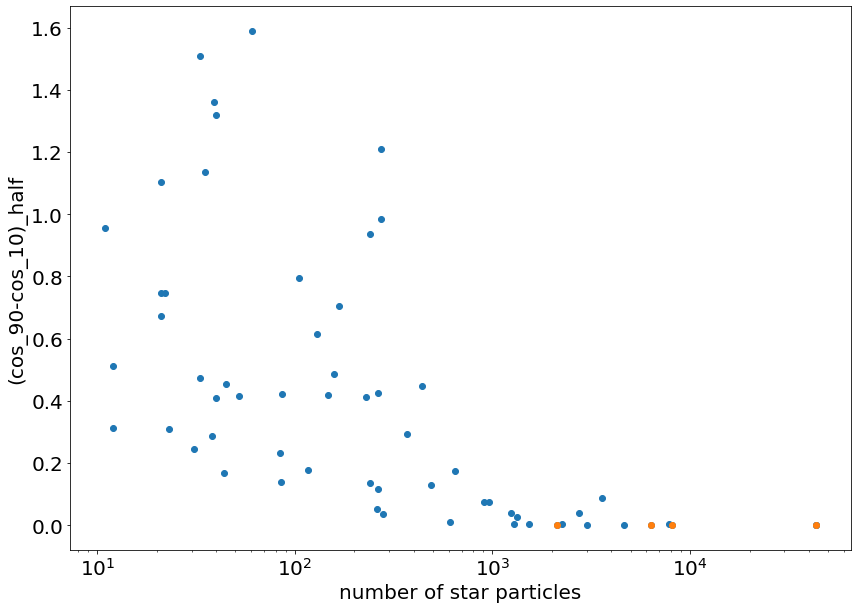

In [35]:
pl.figure(figsize=(14,10))

i = np.where((sats==4338) | (sats==4341) | (sats==4470) | (sats==4474))

pl.scatter(npart, DifHalf)
pl.scatter(npart[i], DifHalf[i])

pl.xscale('log')
pl.xlabel('number of star particles')
pl.ylabel('(cos_90-cos_10)_half')

In [36]:
Sats.keys()

<KeysViewHDF5 ['CosCen', 'CosVel', 'LZ_L', 'SatelliteCentral', 'SatelliteList']>

In [37]:
i = np.where(DifHalf<0.2)[0]

In [38]:
# with h5py.File('SatelliteList_V2_withAngles_n10_difhalf02.h5', 'w') as f:
#     f.create_dataset('SatelliteList', data=Sats['SatelliteList'][i])
#     f.create_dataset('SatelliteCentral', data=Sats['SatelliteCentral'][i])
#     f.create_dataset('CosCen', data=Sats['CosCen'][i])
#     f.create_dataset('CosVel', data=Sats['CosVel'][i])
#     f.create_dataset('LZ_L', data=Sats['LZ_L'][i])
#     f.create_dataset('difHalf', data=DifHalf[i])
#     f.create_dataset('nofstar', data=npart[i])

In [39]:
# but i need the distribution, for those i need 

sats, cents, cosC, cosV = Sats['SatelliteList'][i], Sats['SatelliteCentral'][i], Sats['CosCen'][i], Sats['CosVel'][i]

R200, GalCen, GroCen = [], [], []

for ss, cc in zip(sats, cents):
    group = sim['SnapNumber_128/SubGroups/GroupNumber'][cc]
    r200 = sim['SnapNumber_128/Groups/Group_R_Crit200'][group]
    galCen = sim['SnapNumber_128/SubGroups/SubGroupPos'][ss]
    groCen = sim['SnapNumber_128/SubGroups/SubGroupPos'][cc]
    
    R200.append(r200)
    GalCen.append(galCen)
    GroCen.append(groCen)

R200, GalCen, GroCen = np.array(R200), np.array(GalCen), np.array(GroCen)

sep = GalCen - GroCen
dist = np.sqrt(sep[:,0]**2+sep[:,1]**2+sep[:,2]**2)
dist = dist/R200

In [40]:
ii = np.where(dist>0.5)
cosCR, cosVR = cosC[ii], cosV[ii]
satsR, centsR = sats[ii], cents[ii]

import scipy.stats as sps

In [41]:
# bootstrap!! because yes, bootstrap

n = 10000 # i guees is ok with that

dataCR = np.zeros((3,n))
dataVR = np.zeros((3,n))

for i in range(n):
    CosCR = np.random.choice(cosCR, cosCR.size)
    CosVR = np.random.choice(cosVR, cosVR.size)
    
    valueCR, edge, bbb = sps.binned_statistic(np.abs(CosCR), np.abs(CosCR), statistic='count', bins=3, range=(0.,1.))
    valueVR, edge, bbb = sps.binned_statistic(np.abs(CosVR), np.abs(CosVR), statistic='count', bins=3, range=(0.,1.))

    dataCR[:,i] = valueCR
    dataVR[:,i] = valueVR
    
valCR = np.array([np.mean(dataCR[0]), np.mean(dataCR[1]), np.mean(dataCR[2])])
errCR = np.array([np.std(dataCR[0]), np.std(dataCR[1]), np.std(dataCR[2])])

valVR = np.array([np.mean(dataVR[0]), np.mean(dataVR[1]), np.mean(dataVR[2])])
errVR = np.array([np.std(dataVR[0]), np.std(dataVR[1]), np.std(dataVR[2])])

xs = (edge[:-1]+edge[1:])*.5

In [42]:
# ok, randomize the thing via, idk, i can take each of this and put a random center

def getAnglesRand(gal):
    offGas = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][gal].astype('int')
    RotMass = sim['SnapNumber_128/SubGroups/PartType4/RotationMatrix'][gal]
    cenGas = sim['SnapNumber_128/SubGroups/SubGroupPos'][gal]
    RotII = RotMass.T
    R = np.array([0., 0., 1.])
    R_rot = np.dot(RotII, R.T).T
    
    velGal = sim['SnapNumber_128/SubGroups/SubGroupVel'][gal]
#     cenGro = sim['SnapNumber_128/SubGroups/SubGroupPos'][centre]
#     velGro = sim['SnapNumber_128/SubGroups/SubGroupVel'][centre]
    boxsize = sim['SnapNumber_128/Header/BoxSize'][()]
    cenGro = np.random.random(size=3)*boxsize
  
    vecCen = cenGro - cenGas
   # vecVel = velGal - velGro
    vecVel = np.random.random(size=3)
    
    vecCenN = vecCen/np.sqrt(np.sum(vecCen**2.))
    vecVelN = vecVel/np.sqrt(np.sum(vecVel**2.))
    
    # and cosines
    cosCen = np.dot(R_rot, vecCenN)
    cosVel = np.dot(R_rot, vecVelN)
    
    Ls = sim['SnapNumber_128/PartType4/SpecificAngularMomentum'][offGas[0]:offGas[1]]
    Lz = Ls[:,2]
    L = np.sqrt(Ls[:,0]**2+Ls[:,1]**2+Ls[:,2]**2)
    LzL = Lz/L
    
    ii = np.where(np.isnan(LzL)==False)
    LzL = LzL[ii]
    
    LzM = np.mean(LzL)
    
    return cosCen, cosVel, LzM

In [43]:
cosRan, cosRanV = [], []

for ss in zip(satsR):
    cc, cv, crap = getAnglesRand(ss)
    cosRan.append(cc)
    cosRanV.append(cv)
    
cosRan = np.array(cosRan)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


In [44]:
# and boostrap this stuff

n = 10000 # i guees is ok with that

ranC = np.zeros((3,n))

for i in range(n):
    CosC = np.random.choice(cosRan, cosRan.size)
    
    valueC, edge, bbb = sps.binned_statistic(np.abs(CosC), np.abs(CosC), statistic='count', bins=3, range=(0.,1.))
    
    ranC[:,i] = valueC
    
valRan = np.array([np.mean(ranC[0]), np.mean(ranC[1]), np.mean(ranC[2])])
errRan = np.array([np.std(ranC[0]), np.std(ranC[1]), np.std(ranC[2])])


Text(0, 0.5, 'number of galaxies')

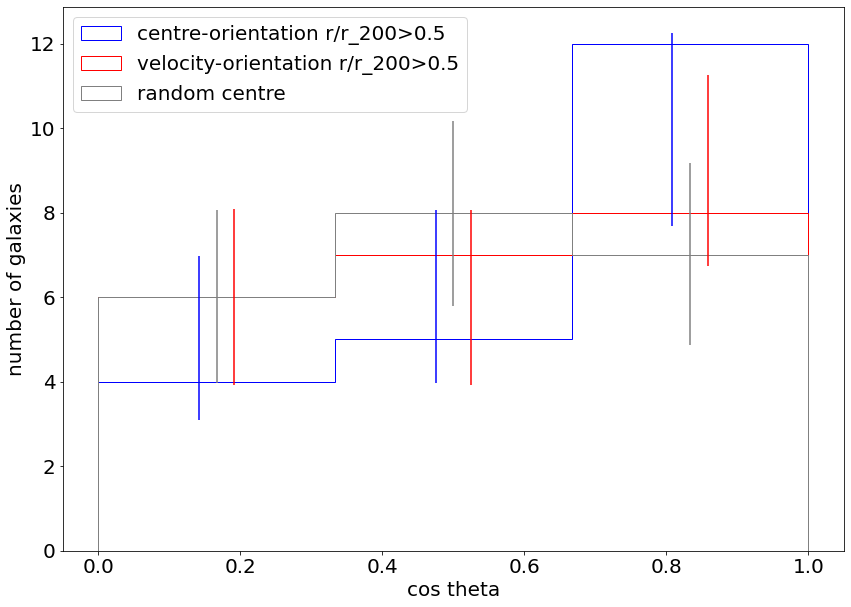

In [45]:
pl.figure(figsize=(14, 10))

pl.hist(np.abs(CosCR), label='centre-orientation r/r_200>0.5', histtype='step', range=(0,1.), bins=3, color='blue')
pl.errorbar(xs-0.025, valCR, yerr=errCR, ls=' ', color='blue')

pl.hist(np.abs(CosVR), label='velocity-orientation r/r_200>0.5', histtype='step', range=(0,1.), bins=3, color='red')
pl.errorbar(xs+0.025, valVR, yerr=errVR, ls=' ', color='red')

pl.hist(np.abs(cosRan), label='random centre', histtype='step', range=(0,1.), bins=3, color='grey')
pl.errorbar(xs, valRan, yerr=errRan, ls=' ', color='grey')

pl.legend(loc=2)
pl.xlabel('cos theta')
pl.ylabel('number of galaxies')

In [46]:
# and, lets see wit n>100
i = np.where(DifHalf<0.2)[0]
nnn = npart[i]

iN = np.where(nnn>100)

satsN100, centsN100, cosCN100, cosVN100 = sats[iN], cents[iN], cosC[iN], cosV[iN] 

In [47]:
# with h5py.File('SatelliteList_V2_withAngles_n100_difhalf02.h5', 'w') as f:
#     f.create_dataset('SatelliteList', data=Sats['SatelliteList'][i][iN])
#     f.create_dataset('SatelliteCentral', data=Sats['SatelliteCentral'][i][iN])
#     f.create_dataset('CosCen', data=Sats['CosCen'][i][iN])
#     f.create_dataset('CosVel', data=Sats['CosVel'][i][iN])
#     f.create_dataset('LZ_L', data=Sats['LZ_L'][i][iN])
#     f.create_dataset('difHalf', data=DifHalf[i][iN])
#     f.create_dataset('nofstar', data=npart[i][iN])

In [48]:
Sats['SatelliteList'][i][iN].size, satsN100.size

(25, 25)

In [49]:
# ok, lets take a look at the K_rot_/k_total, somewhere
sim['SnapNumber_128/PartType4'].keys()

<KeysViewHDF5 ['Abundances', 'BindingEnergy', 'Circularity', 'Coordinates', 'GroupNumber', 'Masses', 'ParticleIDs', 'Potential', 'SpecificAngularMomentum', 'StellarFormationTime', 'SubFindNumber', 'SubGroupNumber', 'Velocities']>

In [50]:
sim['SnapNumber_128/PartType4/SpecificAngularMomentum'].attrs['description_units']

'$ h^{-1} ckpc km s^{-1}$'

In [51]:
sim['SnapNumber_128/SubGroups/SubGroupSpin'].attrs.keys()

<KeysViewHDF5 []>

In [52]:
ff = 4474 # a nice one

spin = sim['SnapNumber_128/SubGroups/SubGroupSpin'][ff]
spinN = spin/np.sqrt(np.sum(spin**2.))
Soff = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][ff].astype('int')
cen = sim['SnapNumber_128/SubGroups/SubGroupPos'][ff]
cenVel = sim['SnapNumber_128/SubGroups/SubGroupVel'][ff]

Js = sim['SnapNumber_128/PartType4/SpecificAngularMomentum'][Soff[0]:Soff[1]]

Jss = np.array([np.sum(Js[:,0]), np.sum(Js[:,1]), np.sum(Js[:,2])])
JssN = Jss/np.sqrt(np.sum(Jss**2.))

In [53]:
spinN, JssN

(array([0.94335985, 0.24710406, 0.22138616], dtype=float32),
 array([-8.25104943e-04, -2.24868997e-03,  9.99997131e-01]))

In [54]:
# lets rotate the thing and see
RotMass = sim['SnapNumber_128/SubGroups/PartType4/RotationMatrix'][ff]
RotII = RotMass.T
R = np.array([0., 0., 1.])
R_rot = np.dot(RotII, R.T).T

R_rot

array([0.90391924, 0.31401736, 0.29038441])

In [55]:
# almost, but this should be the vector to compare with r.
f = (1-spinN[0])/(spinN[1]**2 + spinN[2]**2)
R1 = np.array([[0, spinN[1], spinN[2]], [-spinN[1], 0, 0], [-spinN[2], 0, 0]])
R2 = np.matmul(R1, R1)

RM = np.identity(3) + R1 + R2*f

In [56]:
J_rot = np.dot(RM.T, JssN.T).T
J_rot

array([-0.22160824, -0.03053174,  0.9746577 ])

In [57]:
J_rot2 = np.dot(RotII, JssN.T).T
J_rot2

array([0.90410864, 0.31212111, 0.29183553])

In [58]:
np.dot(R_rot, J_rot2)

0.9999971312935053

In [59]:
np.arccos(np.dot(R_rot, J_rot2))*180/np.pi

0.1372400262292755

In [60]:
iZ = np.where(Js[:,2]>0)

JssD = np.array([np.sum(Js[iZ,0]), np.sum(Js[iZ,1]), np.sum(Js[iZ,2])])

In [61]:
JssDN = JssD/np.sqrt(np.sum(JssD**2.))

In [62]:
JssDN, JssN

(array([-0.00153159, -0.00254452,  0.99999559]),
 array([-8.25104943e-04, -2.24868997e-03,  9.99997131e-01]))

In [63]:
J_rotD2 = np.dot(RotII, JssDN.T).T
J_rotD2

array([0.90391318, 0.31200281, 0.29256659])

In [64]:
np.arccos(np.dot(R_rot, J_rotD2))*180/np.pi

0.17016341023048762

In [65]:
# ok, lets rotate the things there.

PosNow = sim['SnapNumber_128/PartType4/Coordinates'][Soff[0]:Soff[1]]
VelNow = sim['SnapNumber_128/PartType4/Velocities'][Soff[0]:Soff[1]]

posnow = np.array([PosNow[:,0]-cen[0], PosNow[:,1]-cen[1], PosNow[:,2]-cen[2]]).T
velnow = np.array([VelNow[:,0]-cenVel[0], VelNow[:,1]-cenVel[1], VelNow[:,2]-cenVel[2]]).T
masses = sim['SnapNumber_128/PartType4/Masses'][Soff[0]:Soff[1]]

In [66]:
posRot = np.dot(RotMass, posnow.T).T

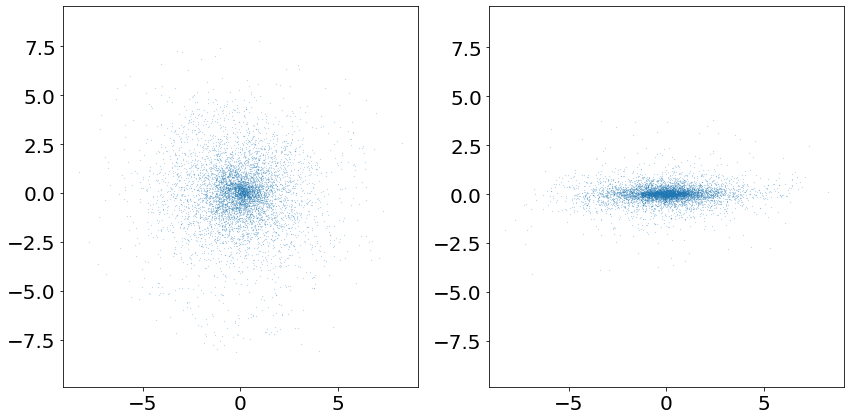

In [67]:
pl.figure(figsize=(14,7))

pl.subplot(1, 2, 1)

pl.axis('equal')
pl.scatter(posRot[:,0], posRot[:,1], s=.01)

pl.subplot(1, 2, 2)

pl.axis('equal')
pl.scatter(posRot[:,0], posRot[:,2], s=.01)

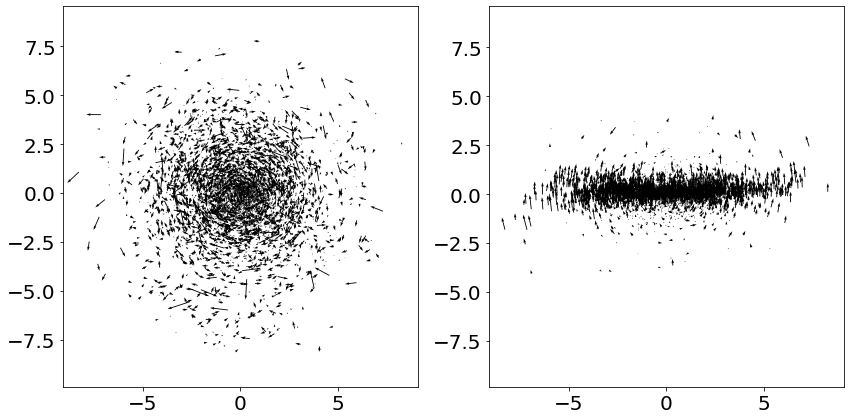

In [68]:
pl.figure(figsize=(14,7))

pl.subplot(1, 2, 1)

pl.axis('equal')
pl.quiver(posRot[:,0], posRot[:,1], Js[:,0], Js[:,1])

pl.subplot(1, 2, 2)

pl.axis('equal')
pl.quiver(posRot[:,0], posRot[:,2], Js[:,0], Js[:,2])

In [69]:
# ok, lets see the k_rot
Jz = np.array([0., 0., 1.])

In [70]:
Ji = 0.
ip = []

ic = 0
for pr, jr, mm in zip(posRot, Js, masses):
    ddot = np.dot(jr, Jz)
    if ddot>0.:
        rr = np.sum(pr**2.)
        tp = ddot**2./(rr-np.dot(pr, Jz)**2.)
        Ji += mm*tp
        ip.append(ic)
    ic += 1
    
ip = np.array(ip)

In [71]:
ip.size, posRot.shape

(5670, (6331, 3))

In [72]:
Ji

96.8147089157709

In [73]:
vel = velnow[ip]
v2 = vel[:,0]**2.+vel[:,1]**2.+vel[:,2]**2.

Jt = masses[ip]*v2
Kt = np.sum(Jt)

In [74]:
Ji/Kt

0.7149990616897145

In [75]:
def get_KrotOverK(ff):
    Soff = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][ff].astype('int')
    cen = sim['SnapNumber_128/SubGroups/SubGroupPos'][ff]
    cenVel = sim['SnapNumber_128/SubGroups/SubGroupVel'][ff]

    Js = sim['SnapNumber_128/PartType4/SpecificAngularMomentum'][Soff[0]:Soff[1]]
    
    RotMass = sim['SnapNumber_128/SubGroups/PartType4/RotationMatrix'][ff]
    
    PosNow = sim['SnapNumber_128/PartType4/Coordinates'][Soff[0]:Soff[1]]
    VelNow = sim['SnapNumber_128/PartType4/Velocities'][Soff[0]:Soff[1]]

    posnow = np.array([PosNow[:,0]-cen[0], PosNow[:,1]-cen[1], PosNow[:,2]-cen[2]]).T
    velnow = np.array([VelNow[:,0]-cenVel[0], VelNow[:,1]-cenVel[1], VelNow[:,2]-cenVel[2]]).T
    masses = sim['SnapNumber_128/PartType4/Masses'][Soff[0]:Soff[1]]
    
    posRot = np.dot(RotMass, posnow.T).T
    
    Jz = np.array([0., 0., 1.])
    
    Ji = 0.
    ip = []

    ic = 0
    for pr, jr, mm in zip(posRot, Js, masses):
        ddot = np.dot(jr, Jz)
        if ddot>0.:
            rr = np.sum(pr**2.)
            tp = ddot**2./(rr-np.dot(pr, Jz)**2.)
            Ji += mm*tp
            ip.append(ic)
        ic += 1
    
    ip = np.array(ip)
    
    vel = velnow[ip]
    v2 = vel[:,0]**2.+vel[:,1]**2.+vel[:,2]**2.

    Jt = masses[ip]*v2
    Kt = np.sum(Jt)
    
    return Ji/Kt

In [76]:
sats = Sats['SatelliteList'][()]

In [77]:
bar = progressbar.ProgressBar(max_value=sats.size)

c = 0
KoK = []

for s in sats:
    kokt = get_KrotOverK(s)
    KoK.append(kokt)
    c += 1
    bar.update(c)

KoK = np.array(KoK)

 96% (58 of 60) |####################### | Elapsed Time: 0:00:01 ETA:   0:00:00

(array([ 9., 16., 11.,  8.,  4.,  4.,  3.,  2.,  0.,  3.]),
 array([0.27556666, 0.32084965, 0.36613264, 0.41141562, 0.45669861,
        0.5019816 , 0.54726459, 0.59254757, 0.63783056, 0.68311355,
        0.72839654]),
 <a list of 10 Patch objects>)

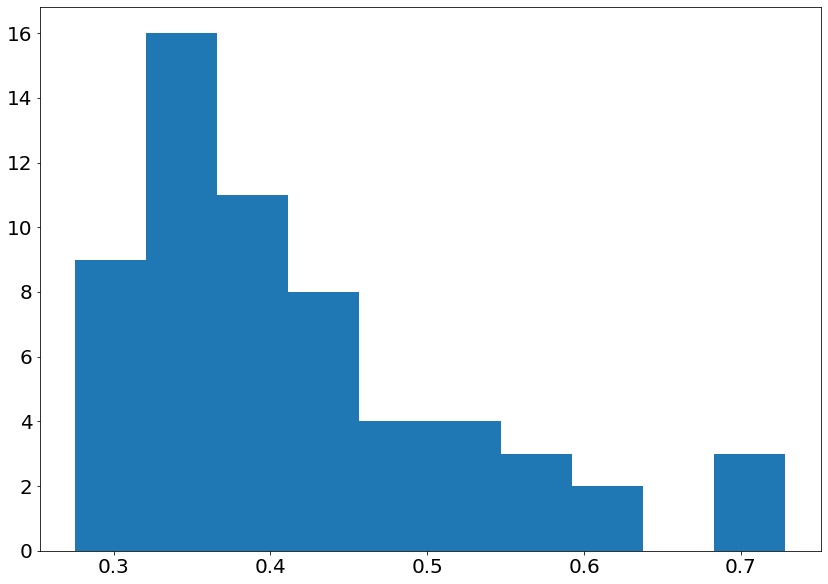

In [78]:
pl.figure(figsize=(14, 10))

pl.hist(KoK)

Text(0, 0.5, '(cos_90-cos_10)_half')

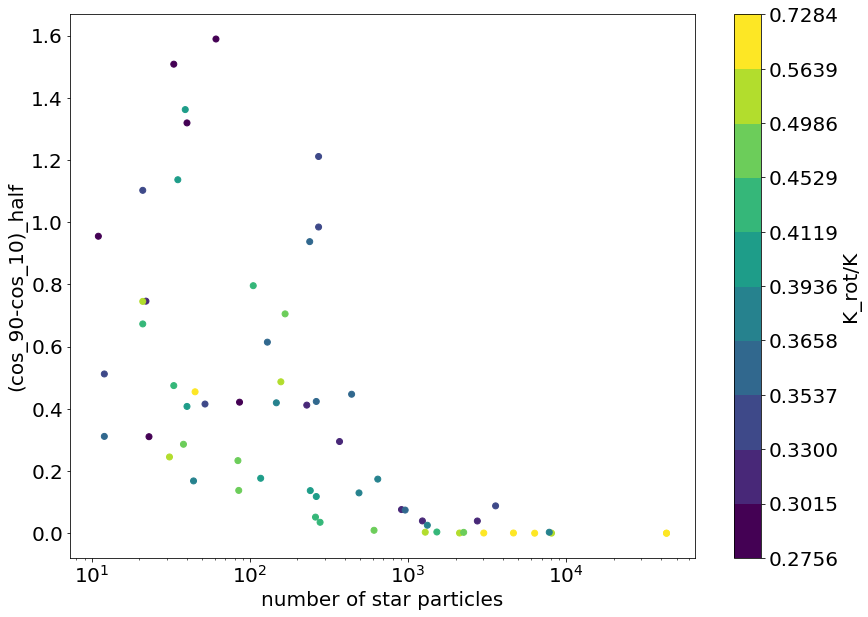

In [79]:
pl.figure(figsize=(14,10))

vaper = np.linspace(0, 100, 11)
papels = np.percentile(KoK, vaper)

norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(npart, DifHalf, c=KoK, norm=norm)

bar = pl.colorbar(label='K_rot/K')
bar.set_ticks(papels)

pl.xscale('log')
pl.xlabel('number of star particles')
pl.ylabel('(cos_90-cos_10)_half')

In [80]:
np.median(KoK)

0.3935689422610946

Text(0, 0.5, 'K_rot/K')

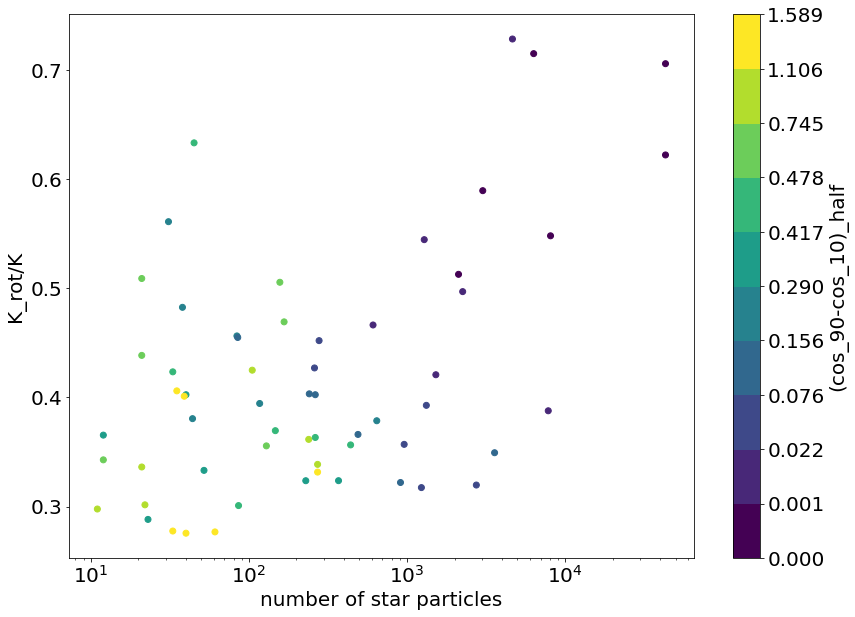

In [81]:
pl.figure(figsize=(14,10))

vaper = np.linspace(0, 100, 11)
papels = np.percentile(DifHalf, vaper)

norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(npart, KoK, c=DifHalf, norm=norm)

bar = pl.colorbar(label='(cos_90-cos_10)_half')
bar.set_ticks(papels)

pl.xscale('log')
pl.xlabel('number of star particles')
pl.ylabel('K_rot/K')

In [82]:
# ok I'll cut at 0.4 mu

iK = np.where(KoK>0.4) # at least

In [83]:
# with h5py.File('SatelliteList_V2_withAngles_n10_KoK04.h5', 'w') as f:
#     f.create_dataset('SatelliteList', data=Sats['SatelliteList'][iK])
#     f.create_dataset('SatelliteCentral', data=Sats['SatelliteCentral'][iK])
#     f.create_dataset('CosCen', data=Sats['CosCen'][iK])
#     f.create_dataset('CosVel', data=Sats['CosVel'][iK])
#     f.create_dataset('difHalf', data=DifHalf[iK])
#     f.create_dataset('nofstar', data=npart[iK])
#     f.create_dataset('KoK', data=KoK[iK])

In [84]:
inK = np.where((npart>500) & (KoK>0.4))

In [85]:
# with h5py.File('SatelliteList_V2_withAngles_n500_KoK04.h5', 'w') as f:
#     f.create_dataset('SatelliteList', data=Sats['SatelliteList'][inK])
#     f.create_dataset('SatelliteCentral', data=Sats['SatelliteCentral'][inK])
#     f.create_dataset('CosCen', data=Sats['CosCen'][inK])
#     f.create_dataset('CosVel', data=Sats['CosVel'][inK])
#     f.create_dataset('difHalf', data=DifHalf[inK])
#     f.create_dataset('nofstar', data=npart[inK])
#     f.create_dataset('KoK', data=KoK[inK])

In [86]:
iN = np.where(npart>500)

In [87]:
# with h5py.File('SatelliteList_V2_withAngles_n500.h5', 'w') as f:
#     f.create_dataset('SatelliteList', data=Sats['SatelliteList'][iN])
#     f.create_dataset('SatelliteCentral', data=Sats['SatelliteCentral'][iN])
#     f.create_dataset('CosCen', data=Sats['CosCen'][iN])
#     f.create_dataset('CosVel', data=Sats['CosVel'][iN])
#     f.create_dataset('difHalf', data=DifHalf[iN])
#     f.create_dataset('nofstar', data=npart[iN])
#     f.create_dataset('KoK', data=KoK[iN])